# Processing SONAR data

First download and extract the XYZ data from https://www.sciencebase.gov/catalog/item/5e3ad833e4b0edb47bddabdb

We will be working with the multibeam dataset

In [33]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import tiledb

test_file = "multibeam.xyz"

We will read this data as a dataframe

In [34]:
df = pd.read_csv(test_file, sep=" ")
df

,Easting,Northing,Elevation
0,1879130.46,16984461.96,557.64
1,1879134.00,16984465.91,557.51
2,1879136.15,16984468.16,557.38
3,1879137.79,16984467.78,557.45
4,1879140.79,16984470.39,557.45
...,...,...,...
4723885,1884840.01,16973616.60,592.16
4723886,1884840.65,16973618.65,592.12
4723887,1884843.98,16973620.75,592.09
4723888,1884847.05,16973623.60,591.93


We will now create a TileDB schema

In [35]:
array_name = "arrays/sonar"

try:
    import shutil
    shutil.rmtree(array_name)
except:
    pass

dom = tiledb.Domain(
    tiledb.Dim(name="Easting", domain=(df["Easting"].min(), df["Easting"].max()), tile=1000, dtype=np.float32),
    tiledb.Dim(name="Northing", domain=(df["Northing"].min(), df["Northing"].max()), tile=1000, dtype=np.float32),
)

schema = tiledb.ArraySchema(
    domain=dom, sparse=True, attrs=[tiledb.Attr(name="Elevation", dtype=np.float32)], allows_duplicates=True
)

tiledb.SparseArray.create(array_name, schema)

In [36]:
tiledb.from_pandas(array_name, df, sparse=True, mode="append", duplicates=True)

In [37]:
with tiledb.open(array_name) as arr:
    df = arr.df[:, :]
df

,Easting,Northing,Elevation
0,1877710.875,16982018.0,597.140015
1,1877713.125,16982016.0,597.239990
2,1877713.750,16982014.0,597.210022
3,1877714.000,16982016.0,597.109985
4,1877716.375,16982018.0,597.010010
...,...,...,...
4723885,1891538.250,16973600.0,554.590027
4723886,1891538.500,16973610.0,554.400024
4723887,1891539.875,16973602.0,554.559998
4723888,1891542.375,16973608.0,554.400024


## Plot the result

NameError: name 'cm' is not defined

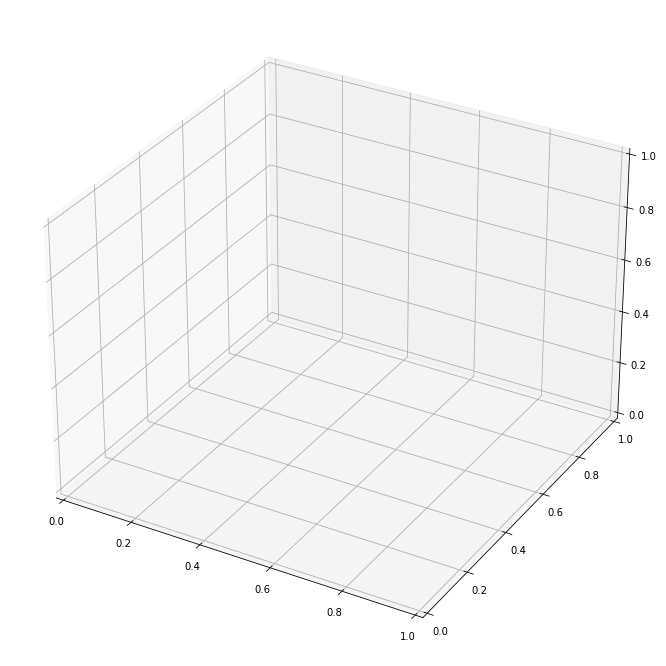

In [38]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.ticklabel_format(useOffset=False)
ax.scatter(df['Easting'], df['Northing'], df['Elevation'], cmap=cm.coolwarm)
ax.set_xlabel('x', fontsize=20, labelpad=20)
ax.set_ylabel('y', fontsize=20, labelpad=35)
ax.set_zlabel('z', fontsize=20, labelpad=25)
ax.set_title('Multibeam echo sounder sample', fontsize=20, pad=20)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis='z', pad=10)

plt.show()